In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numba import njit,prange
from tqdm import tqdm
import ising
import os
import re
from pathlib import Path


%load_ext autoreload
%autoreload 2

### Search all binary files and sort them

In [2]:
foldername = "200x200_up"
#foldername = "100x100_up"
foldername = "200x200_up_long_therm"

extension = "bin"

all_files = np.array([f for f in os.listdir(foldername) if f.endswith(extension)])
Ts = np.zeros(len(all_files))
Hs = np.zeros(len(all_files))

for i,name in enumerate(all_files):
    Ts[i],Hs[i] = re.findall(r'-?\d*\.?\d+', name)

arg_T = np.argsort(Ts)
all_files = all_files[arg_T]
Ts = Ts[arg_T]
Hs = Hs[arg_T]

### Calculate the mean magnetization and compare to exact solution

In [3]:

Ms = np.zeros(len(all_files))
dMs = np.zeros(len(all_files))

for i,filename in enumerate(all_files):
    grids,L,n_configs,Ts[i],Hs[i] = ising.open_configurations(foldername + "/" + all_files[i])
    Ms[i],dMs[i] = ising.mean_magnetization(grids)

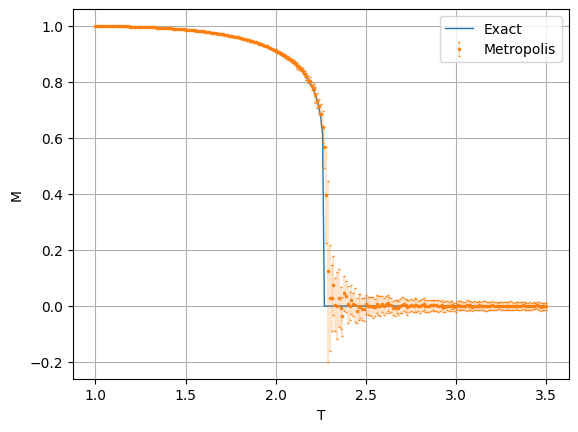

In [4]:
Tc = 2.269185

Mexact = Ts*0.0
Mexact[Ts<Tc] = (1 - np.sinh(2./Ts[Ts<Tc])**(-4) )**(1/8)

plt.plot(Ts,Mexact,linewidth=1,label="Exact")
plt.errorbar(Ts,Ms,dMs,fmt='.',markersize=3,elinewidth=0.3,capsize=1,markeredgewidth=1,label="Metropolis")
#plt.plot(Ts,Ms,'.',label="Metropolis")

plt.xlabel("T")
plt.ylabel("M")
plt.legend()
plt.grid()
plt.show()

### Open one sample of one state and plot the correlation

In [5]:
foldername = "200x200_random"
foldername = "500x500_random"
extension = "bin"

all_files = np.array([f for f in os.listdir(foldername) if f.endswith(extension)])
Ts = np.zeros(len(all_files))
Hs = np.zeros(len(all_files))

for i,name in enumerate(all_files):
    Ts[i],Hs[i] = re.findall(r'-?\d*\.?\d+', name)

arg_T = np.argsort(Ts)
all_files = all_files[arg_T]
Ts = Ts[arg_T]
Hs = Hs[arg_T]

In [6]:
i = 0
grids,L,n_configs,Ts[i],Hs[i] = ising.open_configurations(foldername + "/" + all_files[i])

T = 0.1


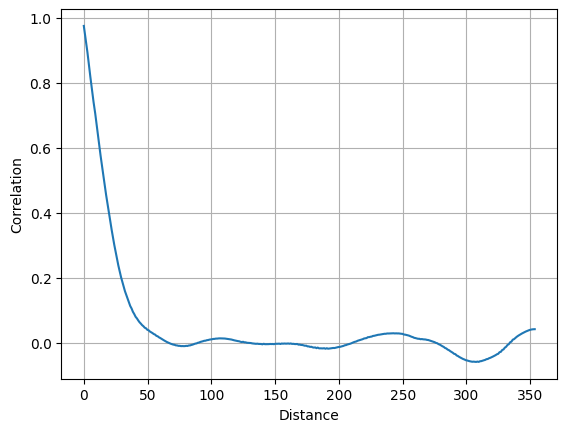

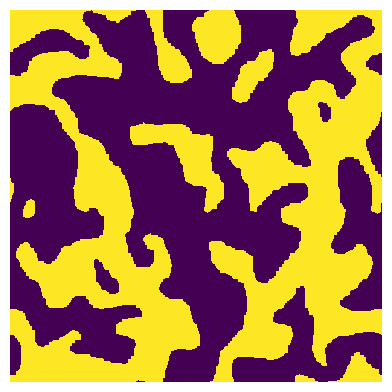

In [7]:
tol = 1
dist,corr = ising.correlation(grids[i],tol=tol)

print("T = " + str(Ts[i]))
plt.plot(dist,corr)
plt.xlabel("Distance")
plt.ylabel("Correlation")
plt.grid()
plt.show()

ising.plot_config(grids[i])


### Open several sample of one state and plot the mean correlation

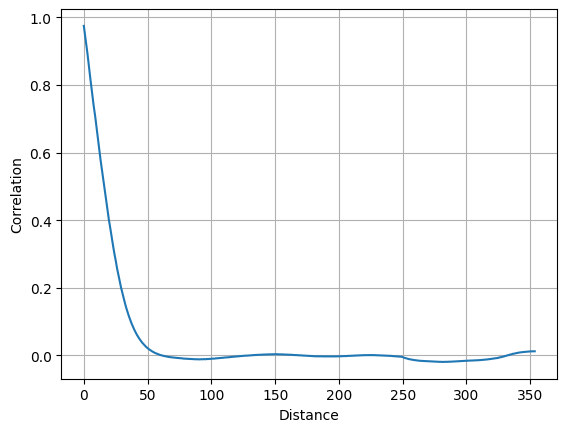

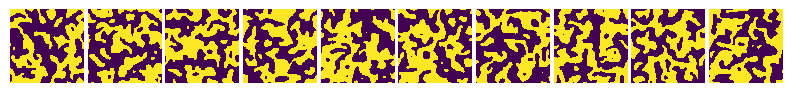

In [8]:
mean_over = range(n_configs)
mean_over = range(10)
tol = 1

r,c = ising.correlation(grids[mean_over[0]],tol = tol)
for j in mean_over[1:]:
    r2,c2 = ising.correlation(grids[j],tol = tol)
    c+=c2
c/= len(mean_over)

plt.plot(r,c)
plt.xlabel("Distance")
plt.ylabel("Correlation")
plt.grid()
plt.show()


ising.plot_configs_from_grids(grids,i=mean_over)

### Plot the mean correlation of few sample for several state and compare

In [28]:
foldername = "200x200_random"
extension = "bin"

all_files = np.array([f for f in os.listdir(foldername) if f.endswith(extension)])
Ts = np.zeros(len(all_files))
Hs = np.zeros(len(all_files))

for i,name in enumerate(all_files):
    Ts[i],Hs[i] = re.findall(r'-?\d*\.?\d+', name)

arg_T = np.argsort(Ts)
all_files = all_files[arg_T]
Ts = Ts[arg_T]
Hs = Hs[arg_T]

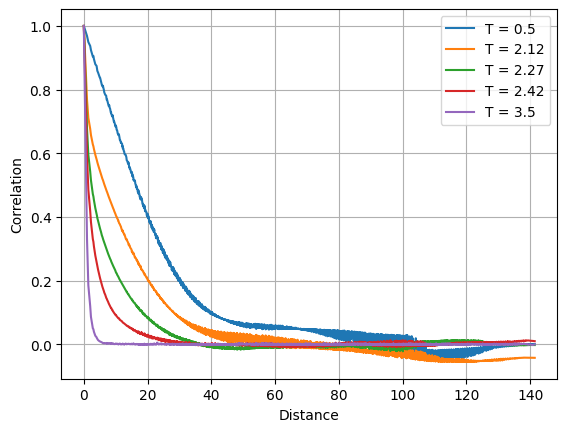

In [29]:


tol = 1e-2

to_plot = [0,54,59,64,100]

for i in to_plot:
    grids,L,n_configs,Ts[i],Hs[i] = ising.open_configurations(foldername + "/" + all_files[i])

    mean_over = range(10)
    r,c = ising.correlation(grids[mean_over[0]],tol = tol)
    for j in mean_over[1:]:
        r2,c2 = ising.correlation(grids[j],tol = tol)
        c+=c2
    c/= len(mean_over)
    plt.plot(r,c,label="T = " + str(Ts[i]))

plt.xlabel("Distance")
plt.ylabel("Correlation")
plt.legend(loc='upper right')
plt.grid()
plt.show()